# Introduction

Googling about a technical topic and browsing images one might have come across a word cloud; a way to visualize the frequencies of words in some text by size. Below is a word cloud of some text about linear algebra (I would guess it is the text from the Wikipedia article).

![Linear Algebra Word Cloud](https://miro.medium.com/v2/resize:fit:1400/1*I5N3dKyrWsgkzbD-PKWBMQ.jpeg)

To create such an image, we will use the package Rake, which transforms a text into a list of pairs consisting of keywords and their respective frequencies. Then we will visualize it using the package WordCloud.

# Scraping Text from Wikipedia


First off, let's get a text which we can base our word cloud on. The following code scrapes all the readable text from the Wikipedia page on Data Science. It is explained in this previous blog post: [HTMLParser Basics](https://fyradur.github.io/posts/HTMLParserBasics/).

In [1]:
import requests
from html.parser import HTMLParser


url = 'https://en.wikipedia.org/wiki/Data_science'
text = requests.get(url).content.decode('utf-8')


class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        # We also in this example choose to remove [ edit ]
        # in the following way.
        self.res += ' '+data.replace('[ edit ]','')


parser = MyHTMLParser()
parser.feed(text)
text = parser.res

# Let's see the beginning of the text.
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data Science and Data Analysis 4 History 5 See also 6 References Toggle the table of contents Data science 46 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Ned

# Getting Key Word Frequencies Using Rake

The package `nlp_rake` provides a method `Rake` that creates an extractor object. We can pass our text into this object using its `apply` method, which will yield a list of keyword-frequency pairs.


When creating the extractor object, we specify the maximum number of words a keyword can consist of, the minimum frequency for a keyword, and the minimum number of characters a keyword can have. In the following code, we use the values 2, 3, and 5, respectively.

In [2]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.925373134328358),
 ('information science', 3.925373134328358),
 ('computer science', 3.925373134328358),
 ('statistical learning', 3.9),
 ('^ davenport', 3.8),
 ('data analysis', 3.75),
 ('science', 1.9253731343283582),
 ('analysis', 1.75),
 ('insights', 1.6666666666666667),
 ('field', 1.4285714285714286),
 ('computational', 1.25),
 ('statistics', 1.2173913043478262),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

# Creating a Word Cloud

The `wordcloud` provides us the method `WordCloud` to create our word cloud object. This object has a method called `generate_from_frequencies` but it doesn't accept the list format our `res` variable has. It needs to be in a dictionary format, so we'll need to convert it to a dictionary before passing it in.

Afterwards, one can save the image of this object to a filepath using the `to_file` method. But to display it in Jupyter, we will use matplotlib to create a figure and then use the method `imshow`.

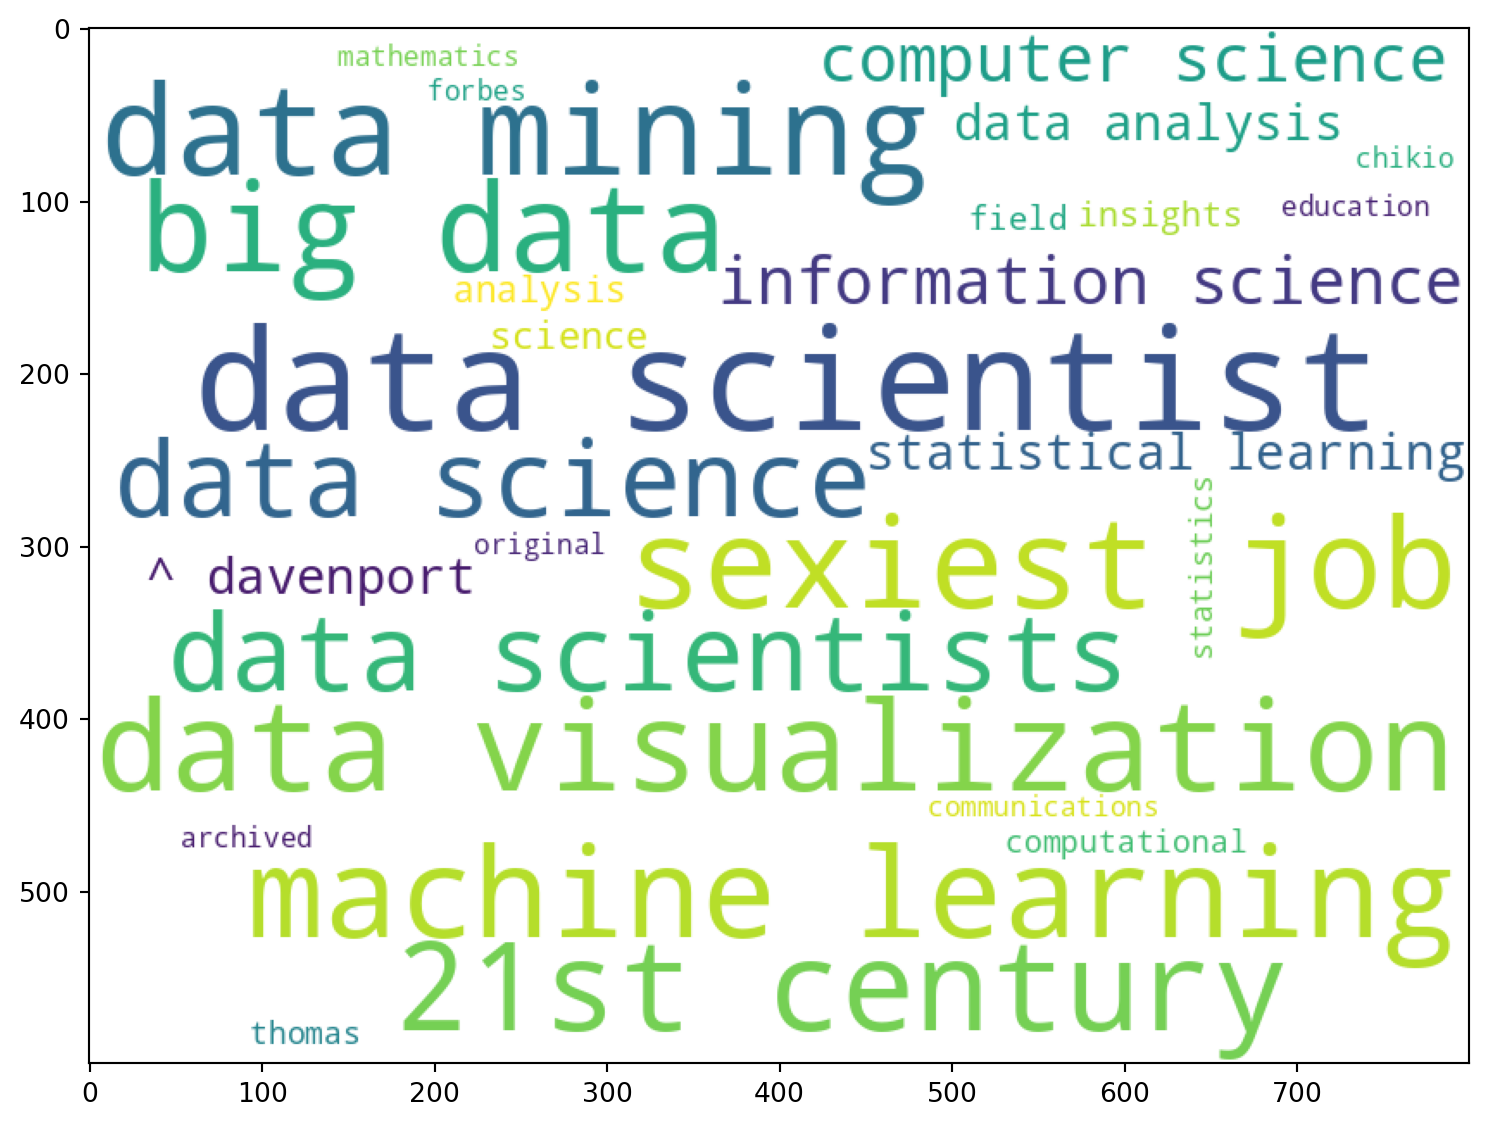

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

# Making a Word Cloud from Raw Text
You can also pass raw text directly into the word cloud object using the `generate` method. However, this approach considers the English language in general, which may not be useful when investigating keywords related to a specific topic.

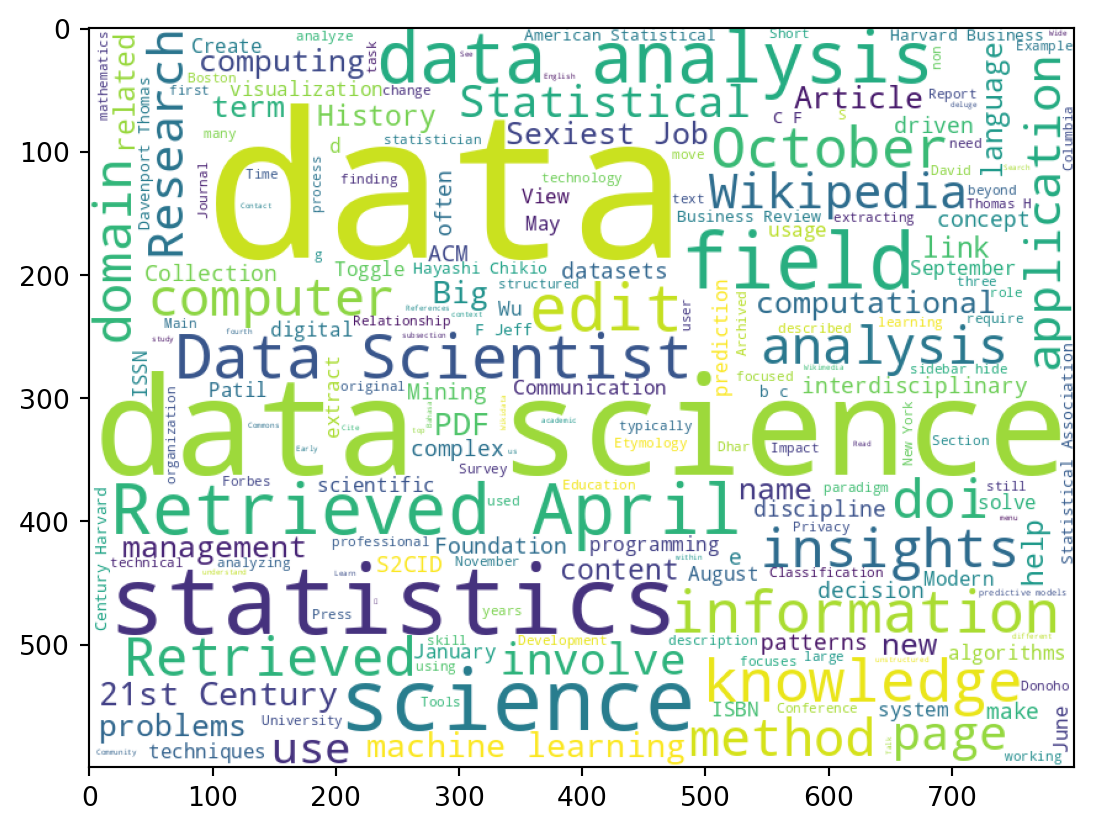

In [4]:
plt.imshow(wc.generate(text))